## 📰 Novelty Detection in News Project

### Introduction
This project aims to develop a novelty detection system applied to sports news. Novelty detection is a machine learning task that identifies new content by comparing it to previously known information.

### 📝 Dataset
We use the **LREC2018 corpus** in many categories, organized by events in subfolders:

- `source` folder: Contains 3 initial articles.
- `target` folder: Contains additional articles labeled as "novel" or "non-novel" in relation to the source articles. These articles will be used to determine if they contain new information (novel) compared to the `source` articles.

### 🔜 Tasks
1. **Novelty Detection**  
   ⚠️ Identify `novel` and `non-novel` news articles by assessing the information in each target article relative to the source articles.

2. **System Development**  
   ⚠️ Develop a system that uses the `source` folder to distinguish between `novel` and `non-novel` information in the new articles within the `target` folder. This involves creating a model that can reliably recognize new information based on content changes detected through `novelty detection algorithms`.

3. **Evaluation and Comparison**  
   ⚠️ Compare the system's results with the `Document Level Annotation (DLA)` attribute in each target article to assess the model’s accuracy using the f1-score. This comparison will validate the system’s ability to label articles accurately as "novel" or "non-novel."

4.   Analise de topicos para entender as diferenças entre os novelty e o não


Each article has a `.txt` file with the content and an accompanying `.xml` file containing metadata such as title, publication date, publisher, and other event-related information.



-----

### Libs

In [1]:
from scripts.parser import CorpusParser 
import os
import pandas as pd
import numpy as np

base_dir = os.getcwd()
corpus_dir = os.path.join(base_dir, 'database', 'TAP-DLND-1.0_LREC2018')

parser = CorpusParser(corpus_dir)
df_news = parser.parse()
df_news

category event_id        news_id  \
0      SPORTS  SPTE001  SPTE001SRC003   
1      SPORTS  SPTE001  SPTE001SRC001   
2      SPORTS  SPTE001  SPTE001SRC002   
3      SPORTS  SPTE001  SPTE001TGT011   
4      SPORTS  SPTE001  SPTE001TGT002   
...       ...      ...            ...   
6099     GOVT  GOVE008  GOVE008TGT030   
6100     GOVT  GOVE008  GOVE008TGT031   
6101     GOVT  GOVE008  GOVE008TGT007   
6102     GOVT  GOVE008  GOVE008TGT009   
6103     GOVT  GOVE008  GOVE008TGT014   

                                                content  is_source  \
0     Dangal: Baba Ramdev to wrestle it out with Rus...       True   
1     Even as the Pro Wrestling League continues, wh...       True   
2     
In the ongoing Pro Wrestling League, Haryana ...       True   
3      Yoga guru Baba Ramdev displayed his wrestling...      False   
4       
Yoga guru Baba Ramdev displayed his wrestli...      False   
...                                                 ...        ...   
6099  ﻿ Prime Minister Narendra Modi will inaugurate...      False   
6100  ﻿Narendra Modi addresses rally in Udhampur. 
J...      False   
6101   
Union Road and Transport Minister Nitin Gadk...      False   
6102  ﻿ PM @narendramodi unveils Plaque to inaugurat...      False   
6103  Prime Minister Narendra Modi today championed ...      False   

             DOP             publisher  \
0     00/00/0000   www.indiatvnews.com   
1     00/00/0000        Indiatimes.com   
2     00/00/0000        www.news18.com   
3     00/00/0000  www.tribuneindia.com   
4     00/00/0000          u4uvoice.com   
...          ...                   ...   
6099  02/04/2017     www.newkerala.com   
6100  02/04/2017         indiatoday.in   
6101  02/04/2017      www.dnaindia.com   
6102  02/04/2017      www.dnaindia.com   
6103  02/04/2017                   src   

                                                  title   eventid  \
0     Dangal-Baba Ramdev to wrestle it out with Russ...   SPTE001   
1     Baba Ramdev Calls Out Olympic Wrestling Medall...   SPTE001   
2     Baba Ramdev Challenges Beijing Olympic Medalli...   SPTE001   
3                                                  <NA>  
SPTE001   
4                                                  <NA>  
SPTE001   
...                                                 ...       ...   
6099                                               <NA>  
GOVE008   
6100                                               <NA>  
GOVE008   
6101                                               <NA>  
GOVE008   
6102                                               <NA>  
GOVE008   
6103                                               <NA>  
GOVE008   

                            eventname   topic  sentence  words  \
0     Baba Ramdev wrestling challenge  SPORTS        13    269   
1     Baba Ramdev wrestling challenge  SPORTS         6     92   
2     Baba Ramdev wrestling challenge  SPORTS        14    267   
3     Baba Ramdev wrestling challenge  SPORTS        14    279   
4     Baba Ramdev wrestling challenge  SPORTS        11    243   
...                               ...     ...       ...    ...   
6099            Chenani-Nashri tunnel    GOVT        11    460   
6100            Chenani-Nashri tunnel    GOVT        13    427   
6101            Chenani-Nashri tunnel    GOVT        18    234   
6102            Chenani-Nashri tunnel    GOVT        13    413   
6103            Chenani-Nashri tunnel    GOVT        21    387   

                                       sourceid        DLA   SLNS  
0                                          <NA>       <NA>   <NA>  
1                                          <NA>       <NA>   <NA>  
2                                          <NA>       <NA>   <NA>  
3     SPTE001SRC001,SPTE001SRC002,SPTE001SRC003      Novel  66.07  
4     SPTE001SRC001,SPTE001SRC002,SPTE001SRC003      Novel  54.55  
...                                         ...        ...    ...  
6099  GOVE008SRC001,GOVE008SRC002,GOVE008SRC003  non-novel  50.00  


In [2]:
# from tabulate import tabulate
# print(tabulate(df_news, headers='keys', tablefmt='psql'))
# Contar los valores True y False en la columna 'is_source'


### Data Structure and Preprocessing news text


**tokenize / remove punctuation and stopwords**

In [3]:
from scripts.tokenize_and_normalize import tokenize_and_remove_punctuation, remove_stopwords

df_news['content_clean_tokenized'] = df_news['content'].apply(tokenize_and_remove_punctuation)
print(df_news['content_clean_tokenized'].iloc[0])

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mab0205/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/mab0205/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


First 10 stopwords: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
['Dangal', 'Baba', 'Ramdev', 'to', 'wrestle', 'it', 'out', 'with', 'Russian', 'Olympic', 'medallist', 'Dangal', 'Baba', 'Ramdev', 'to', 'wrestle', 'it', 'out', 'with', 'Russian', 'Olympic', 'medallist', 'Currently', 'reading', 'Dangal', 'Baba', 'Ramdev', 'to', 'wrestle', 'it', 'out', 'with', 'Russian', 'Olympic', 'medallist', 'Baba', 'Ramdev', 'Wrestling', 'Yoga', 'guru', 'Ramdev', 'will', 'challenge', 'the', 'Olympic', 'for', 'a', 'friendly', 'wrestling', 'bout', 'ahead', 'of', 'the', 'second', 'semifinal', 'match', 'between', 'Mumbai', 'Maharathi', 'and', 'NCR', 'Punjab', 'Royals', 'in', 'the', 'Pro', 'Wrestling', 'League', 'The', 'eye', 'turning', 'match', 'is', 'scheduled', 'at', 'pm', 'today', 'in', 'New', 'Delhi', 'Indira', 'Gandhi', 'Indoor', 'Stadium', 'I', 'have', 'fought', 'bouts', 'with', 'national', 'level', 'wrestlers', 'But', 'playing', 'against', 'an', 'internationally', 'r

In [4]:
# Filtrar contenido sin stopwords
df_news['content_no_sw'] = df_news['content_clean_tokenized'].apply(remove_stopwords)
print('the length of the content:',len(df_news['content_clean_tokenized'].iloc[0]))
print('the length after cleaning:',len(df_news['content_no_sw'].iloc[0]))

the length of the content: 244
the length after cleaning: 147


**Lemmatization**
- The goal is to convert words to their base form to standardize the text data. Inside the script, we need the `spacy en_core_web_sm` model to apply the lemmatization function effectively to our corpus.


In [5]:
from scripts.lemmatize_text import lemmatize_text

df_news = lemmatize_text(df_news,base_dir)
print('ORIGINAL CORPUS:\n',df_news['content'].iloc[0])
print('\nCORPUS CLEANED: \n',df_news['content_no_sw'].iloc[0])

File '/home/mab0205/GitHub/Novelty-Detection-Data-Science/results/lemmatize_text.csv' exists...
ORIGINAL CORPUS:
 Dangal: Baba Ramdev to wrestle it out with Russian Olympic medallist Dangal: Baba Ramdev to wrestle it out with Russian Olympic medallist Currently reading: Dangal: Baba Ramdev to wrestle it out with Russian Olympic medallist #Baba Ramdev , #Wrestling   14:24:22] Yoga guru Ramdev will challenge the 2008 Olympic   for a friendly wrestling bout ahead of the second semifinal match between Mumbai Maharathi and NCR Punjab Royals, in the Pro Wrestling League. 
The eye turning match is scheduled at 6:30 pm today in New Delhi's Indira Gandhi Indoor Stadium. 
“I have fought bouts with national level wrestlers. But playing against an internationally renowned player will be more exciting. You will witness the real power of yoga in this match,” said Ramdev. 
Andrey is   for beating   at the Beijing Olympics. As Andrey reached the finals   
Before the 2nd semifinal on Wednesday, these t

- After applying all the cleaning strategies, the newly processed corpus shows significant differences. This will enhance our exploratory analysis and improve model performance.


**Feature importance and remove non relevant features** 

In [6]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6104 entries, 0 to 6103
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   category                 6104 non-null   object 
 1   event_id                 6104 non-null   object 
 2   news_id                  6104 non-null   object 
 3   content                  6104 non-null   object 
 4   is_source                6104 non-null   bool   
 5   DOP                      6104 non-null   object 
 6   publisher                6103 non-null   object 
 7   title                    669 non-null    object 
 8   eventid                  6104 non-null   object 
 9   eventname                6104 non-null   object 
 10  topic                    6104 non-null   object 
 11  sentence                 6104 non-null   int64  
 12  words                    6104 non-null   int64  
 13  sourceid                 5352 non-null   object 
 14  DLA                     

In [7]:
from scripts.drop_feature import drop_constant_columns

drop_constant_columns(df_news)

No columns were dropped. All columns have multiple unique values or unhashable types.


In [8]:
df_news[:3]

category event_id        news_id  \
0   SPORTS  SPTE001  SPTE001SRC003   
1   SPORTS  SPTE001  SPTE001SRC001   
2   SPORTS  SPTE001  SPTE001SRC002   

                                             content  is_source         DOP  \
0  Dangal: Baba Ramdev to wrestle it out with Rus...       True  00/00/0000   
1  Even as the Pro Wrestling League continues, wh...       True  00/00/0000   
2  \nIn the ongoing Pro Wrestling League, Haryana...       True  00/00/0000   

             publisher                                              title  \
0  www.indiatvnews.com  Dangal-Baba Ramdev to wrestle it out with Russ...   
1       Indiatimes.com  Baba Ramdev Calls Out Olympic Wrestling Medall...   
2       www.news18.com  Baba Ramdev Challenges Beijing Olympic Medalli...   

   eventid                        eventname   topic  sentence  words sourceid  \
0  SPTE001  Baba Ramdev wrestling challenge  SPORTS        13    269      NaN   
1  SPTE001  Baba Ramdev wrestling challenge  SPORTS         6     92      NaN   
2  SPTE001  Baba Ramdev wrestling challenge  SPORTS        14    267      NaN   

   DLA  SLNS                            content_clean_tokenized  \
0  NaN   NaN  ['Dangal', 'Baba', 'Ramdev', 'to', 'wrestle', ...   
1  NaN   NaN  ['Even', 'as', 'the', 'Pro', 'Wrestling', 'Lea...   
2  NaN   NaN  ['In', 'the', 'ongoing', 'Pro', 'Wrestling', '...   

                                       content_no_sw  
0  dangal baba ramdev wrestle russian olympic med...  
1  pro wrestling league continue draw interest ma...  
2  ongoing pro wrestling league haryana hammers j...

- Looking at the variavels, its not interesting using the ids and the title beacause just 6 non-null

In [9]:
df_news.drop(columns=['event_id', 'news_id', 'eventid', 'sourceid', 'title', 'DOP', 'eventname' , 'SLNS'], inplace=True)
print("Columnas restantes en df_news: \n", df_news.columns)

Columnas restantes en df_news: 
 Index(['category', 'content', 'is_source', 'publisher', 'topic', 'sentence',
       'words', 'DLA', 'content_clean_tokenized', 'content_no_sw'],
      dtype='object')


- Dropped  'DOP', 'eventname' and 'topic'
- I didn't find the meaning or what SLNS measures, so removing it might be the best solution because it's difficult to handle the weight of the feature if its representation isn't clear.

- After processing the corpus, it is no longer necessary to use the columns `content_clean_tokenized` and `content`.

In [10]:
df_news.drop(columns=['content_clean_tokenized', 'content'], inplace=True)
print("Columnas restantes en df_news: \n", df_news.columns)

Columnas restantes en df_news: 
 Index(['category', 'is_source', 'publisher', 'topic', 'sentence', 'words',
       'DLA', 'content_no_sw'],
      dtype='object')


- But, what's the content of DLA column? 

In [11]:
counts = df_news['DLA'].value_counts(normalize=True) * 100

print("Percentage of each category in the 'DLA' column:")
for category, percentage in counts.items():
    print(f"{category}: {percentage:.2f}%")

Percentage of each category in the 'DLA' column:
Non-Novel: 43.61%
Novel: 42.39%
non-novel: 7.95%
novel: 6.02%
Non-Novelvel: 0.02%
NovNon-Novelel: 0.02%


**Analysis Insight:**

This information is particularly interesting because we can use `DLA` as an identifier to label news as either "Novel" or "Non-Novel." We will train our model using the `source` news as the training set and the `target` news as the test set. Finally, we’ll compare the results to evaluate how well our model identifies the novelty of new items.


In [12]:
df_news[:3]

category  is_source            publisher   topic  sentence  words  DLA  \
0   SPORTS       True  www.indiatvnews.com  SPORTS        13    269  NaN   
1   SPORTS       True       Indiatimes.com  SPORTS         6     92  NaN   
2   SPORTS       True       www.news18.com  SPORTS        14    267  NaN   

                                       content_no_sw  
0  dangal baba ramdev wrestle russian olympic med...  
1  pro wrestling league continue draw interest ma...  
2  ongoing pro wrestling league haryana hammers j...

- There are 6 null values in the `SLNS` and `DLA` columns. I will check the correlation to assess their importance and determine the best technique to handle this issue. Options include removing the data, using it for testing, or filling in the missing values.

In [13]:
df_source = df_news[df_news['is_source'] == True]
df_target = df_news[df_news['is_source'] == False]

### Exploratory Analysis

- Visualization of variable distribution
- Principal Component Analysis (PCA)
- Latent Semantics and Topic Modeling
- Correlation between variables
- A temporal analysis was not possible due to the lack of temporal data, so our task will be solely focused on classifying new data in relation to target data.

**Variable Distribution**

669 5435


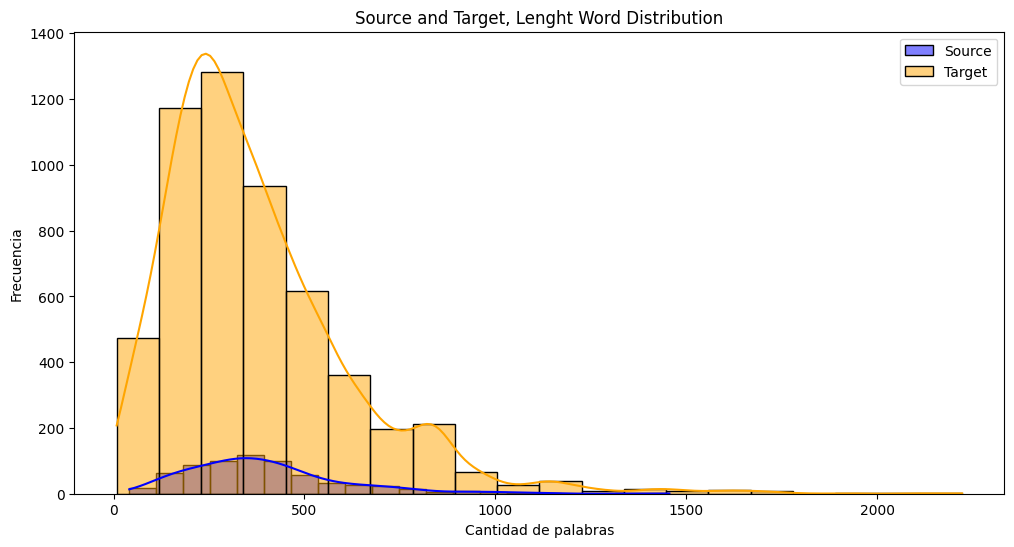

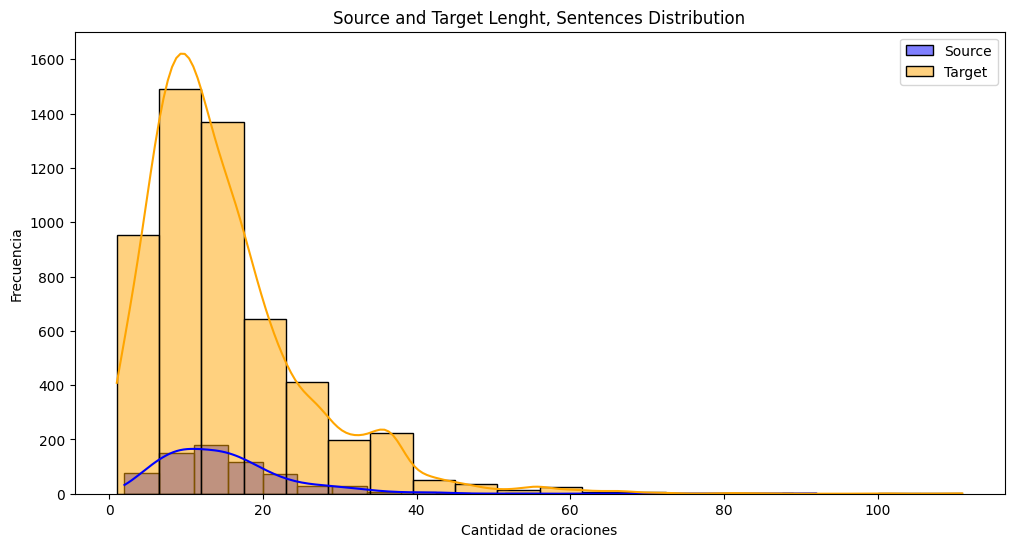

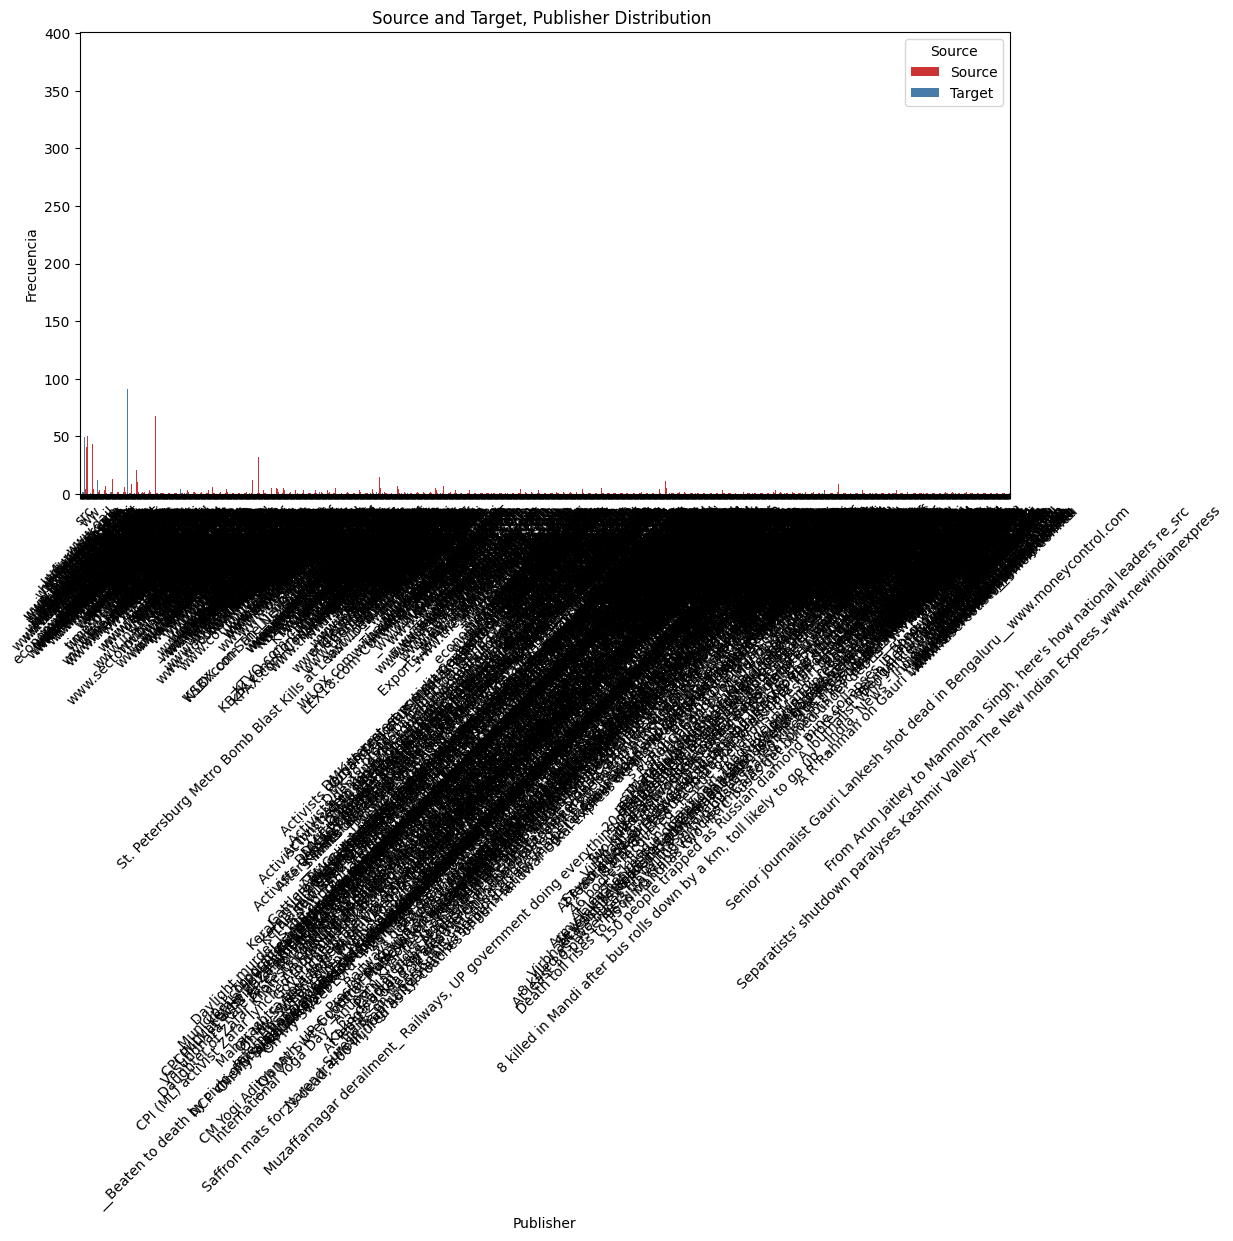

In [14]:
from Exploratory_Analysis.variable_distribution import len_words_distribution, count_sentences_distribution, publisher_distribution
print(len(df_source),len(df_target))
len_words_distribution(df_source, df_target )
count_sentences_distribution(df_source, df_target )
publisher_distribution(df_news)

**Analysis Summary:**

- The word count and sentence count distributions show distinct patterns between `source` and `target`, suggesting structural differences that could be useful for novelty detection.
- The `publisher` feature shows minimal repetition and likely introduces noise, so it may be better to exclude it. This feature could introduce noise because the model may think that a new article from a new publisher is associated with novelty. However, in this case, the dataset doesn't have titles for all of the articles, so we can't combine the title and article as a feature. Therefore, it's better to use only the corpus to identify novelty based on the content.

In [15]:
df_news.drop(columns=['publisher'], inplace=True)
print("Columnas restantes en df_news: \n", df_news.columns)

Columnas restantes en df_news: 
 Index(['category', 'is_source', 'topic', 'sentence', 'words', 'DLA',
       'content_no_sw'],
      dtype='object')



**Next Steps:**
- Extract word and sentence count as additional features to analise if that could be interesting in our analise (PCA).
- Explore other text features like keyword frequency.

###  Principal Component Analises (PCA)
-  PCA transforms the original variables into a new set of variables called principal components, which are orthogonal (uncorrelated) and ordered by the amount of variance they capture from the data. Se below how the original variables are now transformed into the same number of components.

In [16]:
from Exploratory_Analysis.pca import pca_analises
from sklearn.preprocessing import StandardScaler
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.preprocessing import StandardScaler

- Selecting Characteristics for Analysis

In [17]:
null_count_dla = df_news['DLA'].isna().sum()
print(f"Number of rows with NaN in 'DLA': {null_count_dla}")

Number of rows with NaN in 'DLA': 669


- That NaN in DLA are the Source registers. So I'm gonna fill the NaN with ``Non-Novel``

In [18]:
df_news['DLA'].fillna('Non-Novel', inplace=True)

df_news['DLA'] = df_news['DLA'].apply(lambda x: 1 if x == 'Novel' else 0) # reaplace Novel -> 1 ... Non-Novel -> 0 

# Features for PCA
features = ['sentence', 'words']
df_news[features] = df_news[features].astype(float)

df_news[:3]

/tmp/ipykernel_64006/2421769514.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_news['DLA'].fillna('Non-Novel', inplace=True)


category  is_source   topic  sentence  words  DLA  \
0   SPORTS       True  SPORTS      13.0  269.0    0   
1   SPORTS       True  SPORTS       6.0   92.0    0   
2   SPORTS       True  SPORTS      14.0  267.0    0   

                                       content_no_sw  
0  dangal baba ramdev wrestle russian olympic med...  
1  pro wrestling league continue draw interest ma...  
2  ongoing pro wrestling league haryana hammers j...

### Novel -> 1 ---- Non-Novel -> 0 

* Normalizing Data

In [19]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(df_news[features])

**Box Plot Analysis after Normalizing Data**

<Axes: >

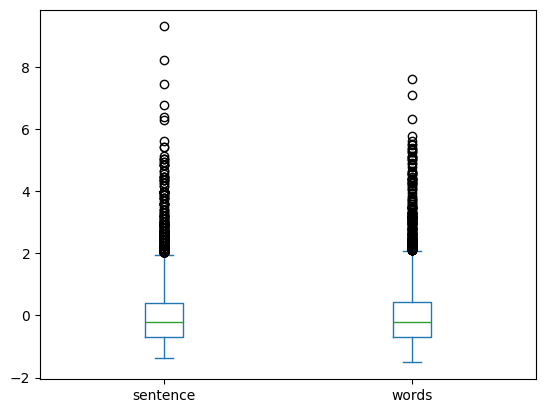

In [20]:
df_normalized = pd.DataFrame(X_normalized, columns=features)

df_normalized[['sentence', 'words']].plot.box()

- The boxplot shows that both sentence and words features are centered around the mean with similar variability, and both contain some outliers, indicating articles with higher word or sentence counts. 
- **These outliers could potentially be associated with novel content, making them worth further investigation.**

           PC1       PC2
0    -0.449511  0.173052
1    -1.444786  0.208194
2    -0.386751  0.247455
3    -0.351822  0.212525
4    -0.662353  0.111571
...        ...       ...
6099 -0.030713 -0.520069
6100  0.010393 -0.286851
6101 -0.208483  0.617834
6102 -0.030358 -0.246100
6103  0.442609  0.378228

[6104 rows x 2 columns]


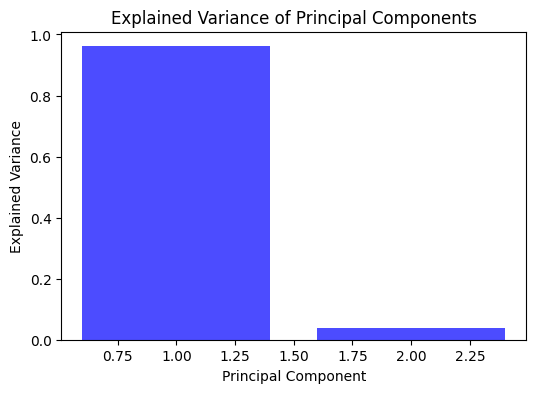


               PC1       PC2
sentence  0.707107  0.707107
words     0.707107 -0.707107


In [21]:
df_pca = pca_analises(X_normalized,features)

- **The first component** captures approximately **80%** of the variance, it is recommended to use only the first component and discard the original features, at least as an initial test. This approach would reduce dimensionality and could simplify the model without losing much information.

In [22]:
df_pca

PC1       PC2
0    -0.449511  0.173052
1    -1.444786  0.208194
2    -0.386751  0.247455
3    -0.351822  0.212525
4    -0.662353  0.111571
...        ...       ...
6099 -0.030713 -0.520069
6100  0.010393 -0.286851
6101 -0.208483  0.617834
6102 -0.030358 -0.246100
6103  0.442609  0.378228

[6104 rows x 2 columns]

In [23]:
# Reindxing
df_news.reset_index(drop=True, inplace=True)
df_pca.reset_index(drop=True, inplace=True)

df_news = pd.merge(df_news, df_pca[['PC1']], left_index=True, right_index=True, how='left')

df_news.drop(columns=['sentence', 'words'], inplace=True)

print(df_news.columns)
print(df_news.shape)

Index(['category', 'is_source', 'topic', 'DLA', 'content_no_sw', 'PC1'], dtype='object')
(6104, 6)


**Latent Semantic Analysis (LSA)** - LDA 
- technique  that helps to uncover the hidden (latent) relationships between words in a large corpus of text.
- Analysis of Variance in Text Data:
Evaluating the variance of extracted text features (such as TF-IDF or embeddings) can indicate how diverse the content is within source and target. If target shows greater variance, this could support the hypothesis that it contains novel information.

- First is necessary know the number of topics and the number of documents for each topic to identify the best estrategy for latent Analysis

In [24]:

num_topics = df_news['topic'].nunique()
print(f"Number of unique topics: {num_topics}")

topic_counts = df_news['topic'].value_counts()
print("Number of documents per topic:")
print(topic_counts)

Number of unique topics: 11
Number of documents per topic:
topic
POLITICS      1641
TERROR         776
ARTS           718
BUSINESS       571
ACCIDENT       533
GOVT           500
CRIME          441
NATURE         367
SOCIETY        292
GOVERNMENT     169
SPORTS          96
Name: count, dtype: int64


In [25]:
from Exploratory_Analysis.topics_plot import plot_topic_counts
topic_counts = df_news['topic'].value_counts().to_dict()

# plot_topic_counts(topic_counts)

- Knowing that there are s11 categories that have diferente quantity documents Im gonna establish an arbitary value for num_topics that im going to generate

CoherenceModel is also going to be analised 

In [26]:
from Exploratory_Analysis.lda import lda_on_all_documents , preprocess_text_dual , visualize_lda

df_with_topics, lda_model, corpus, dictionary = lda_on_all_documents(df_news, text_column='content_no_sw' , num_topics=11)

[nltk_data] Downloading package punkt to /home/mab0205/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mab0205/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Coherence Score: 0.4943242747589185


In [27]:
df_with_topics.columns

Index(['category', 'is_source', 'topic', 'DLA', 'content_no_sw', 'PC1',
       'tokens', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4',
       'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10'],
      dtype='object')

**Analyse Bag words for each topic**

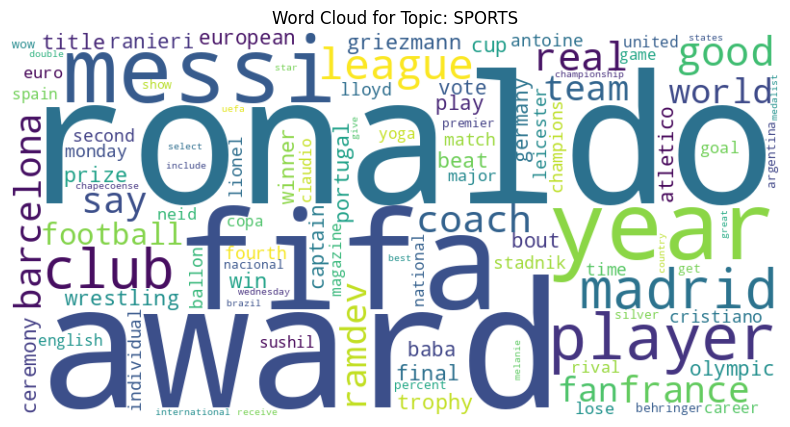

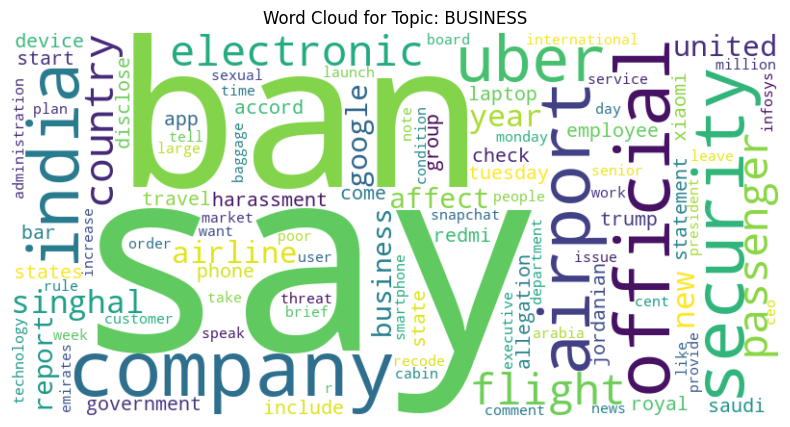

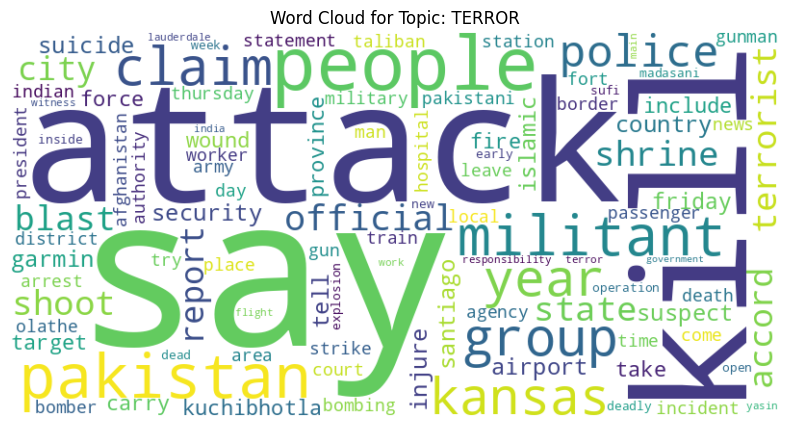

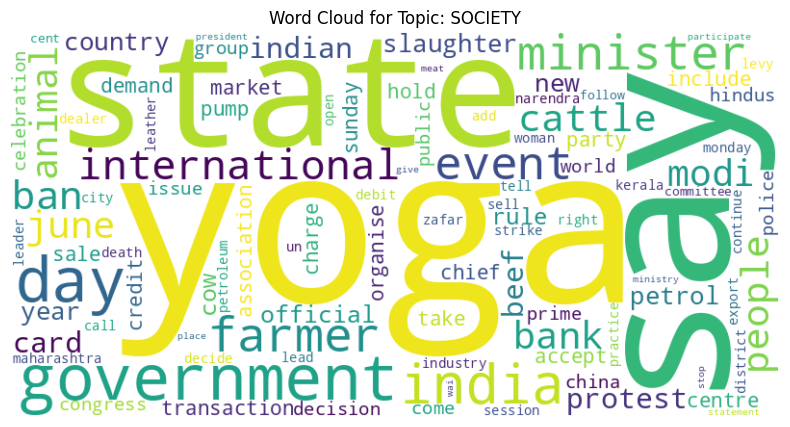

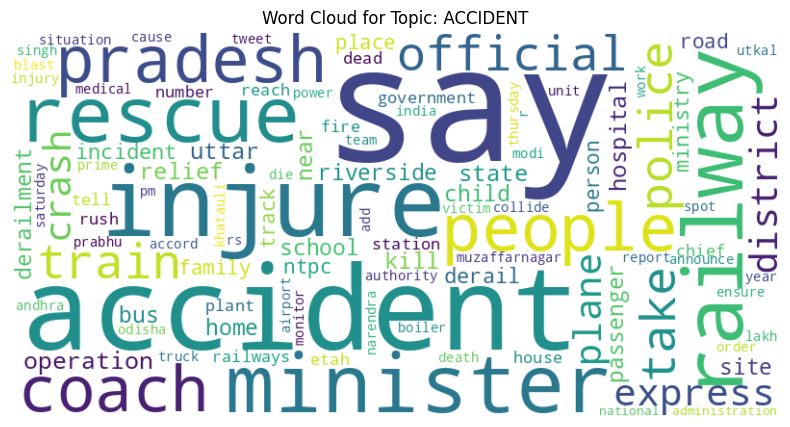

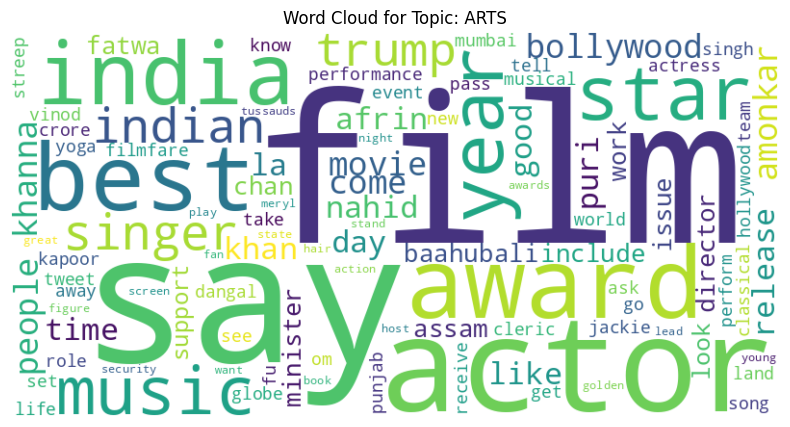

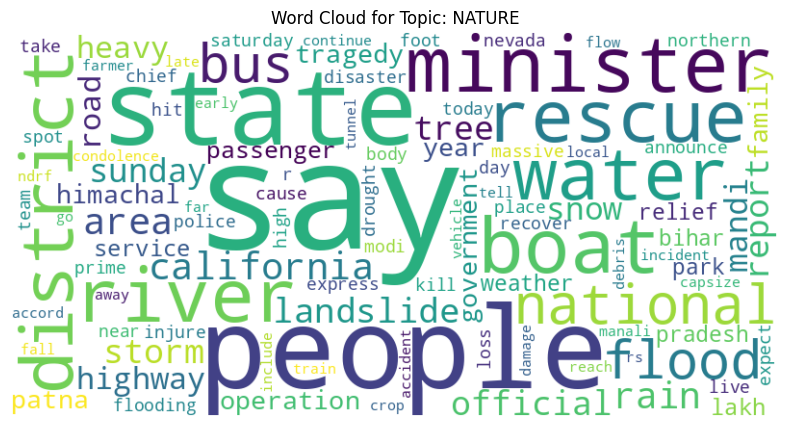

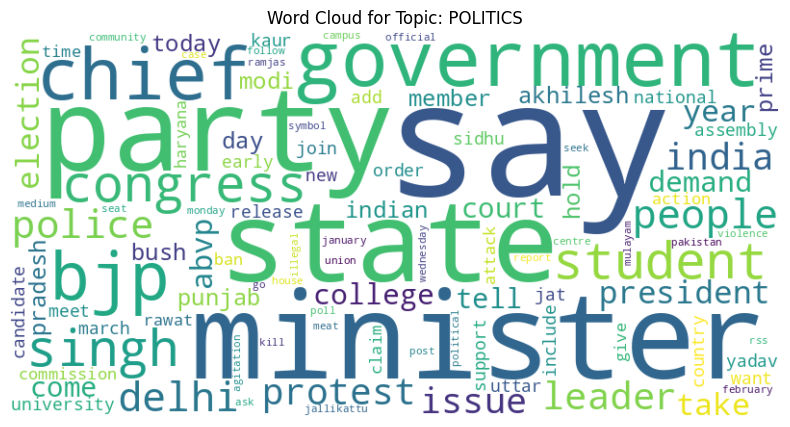

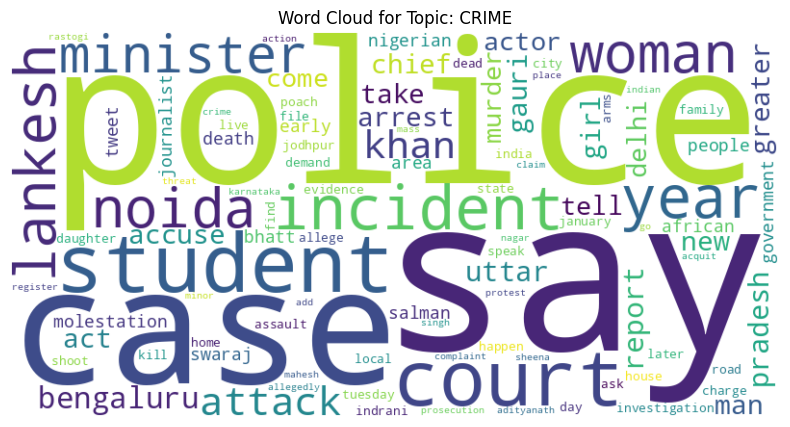

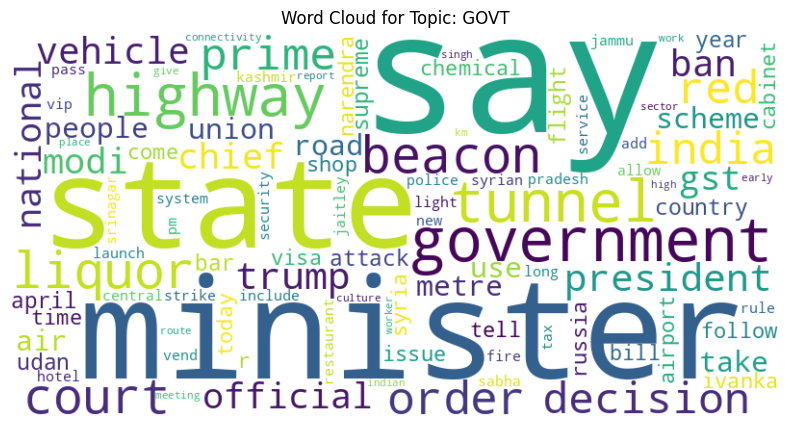

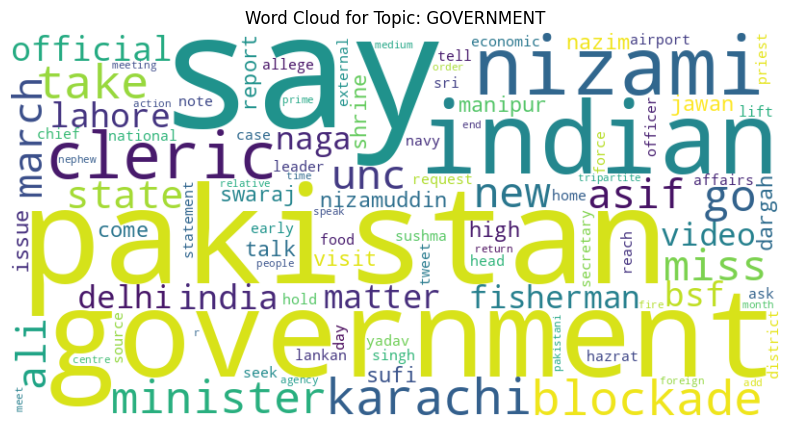

In [28]:
from scripts.generate_words_cloud import plot_word_clouds_by_topic
plot_word_clouds_by_topic(df_with_topics, token_column='tokens', topic_column='topic')

- After seen the bag of words the word 'say' is really frequent so Im gonna retrain the model without the word 

In [29]:
custom_stopwords = ['say', 'said', 'says', 'told']

# Preprocess the text
df_aux = preprocess_text_dual(df_news, text_column='content_no_sw', custom_stopwords=custom_stopwords)

In [30]:
df_aux.columns

Index(['category', 'is_source', 'topic', 'DLA', 'content_no_sw', 'PC1',
       'tokens', 'cleaned_text', 'full_text'],
      dtype='object')

In [31]:
len(df_aux)

6104

In [32]:
df_corrected, lda_model, corpus, dictionary = lda_on_all_documents(df_aux, text_column='cleaned_text', num_topics=11)

Coherence Score: 0.4760963744369787


- the coherence score is less because with out a commun word is normal to be reduzed, afterall the values between 3-6 are considered ok 

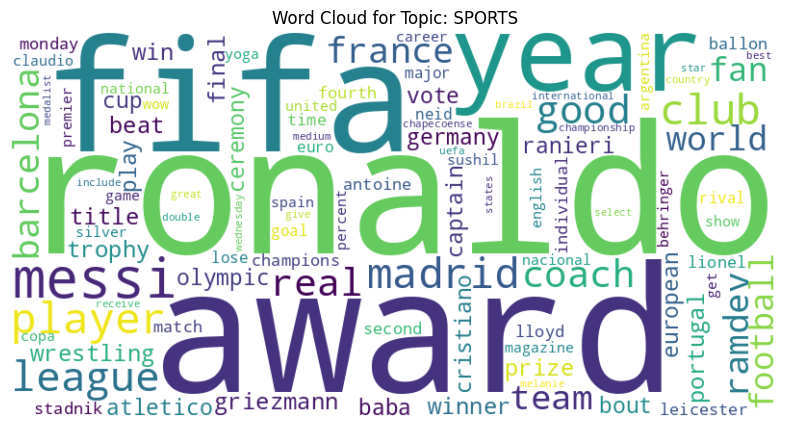

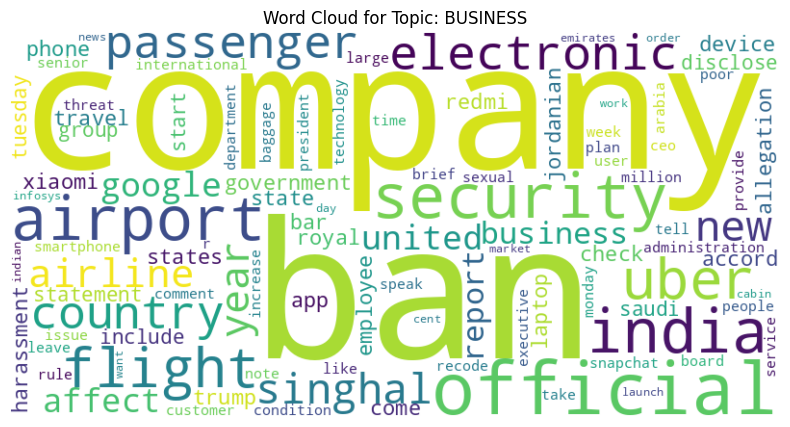

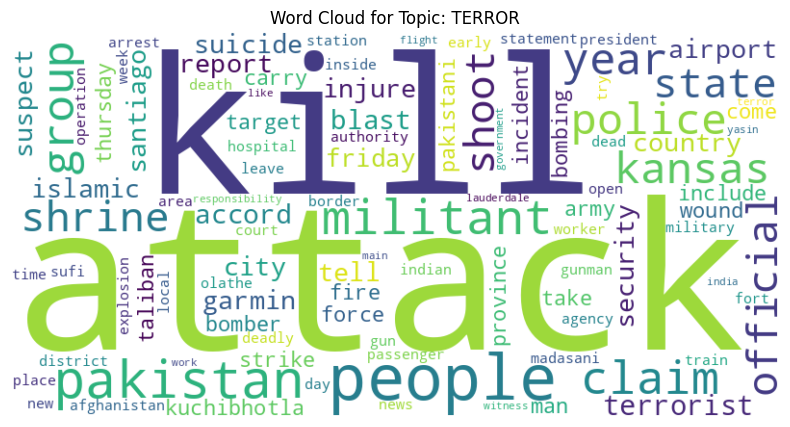

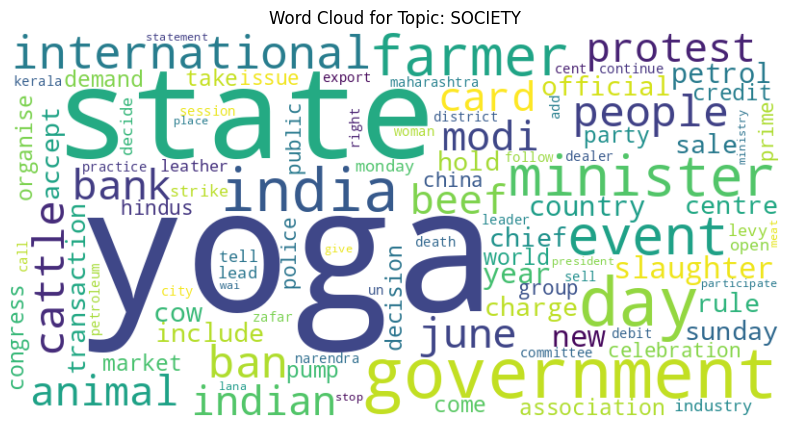

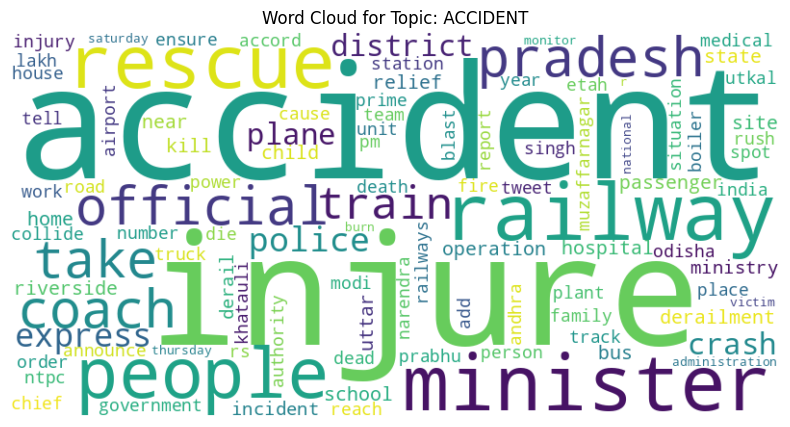

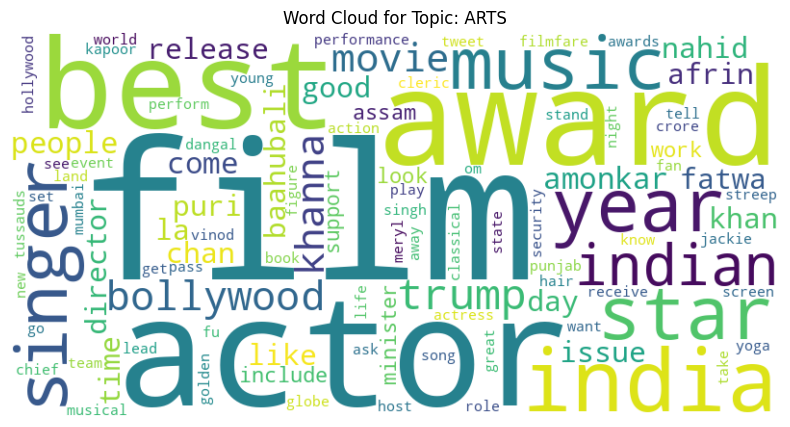

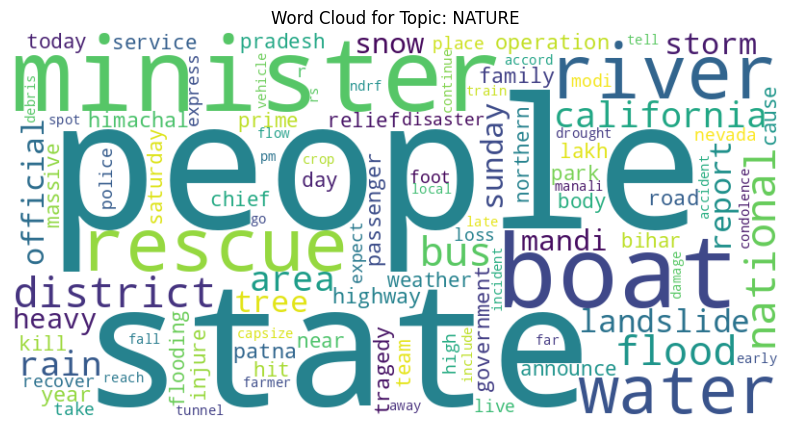

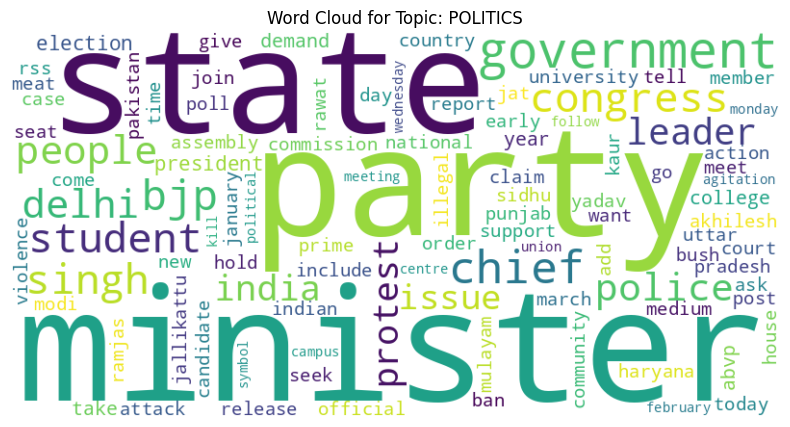

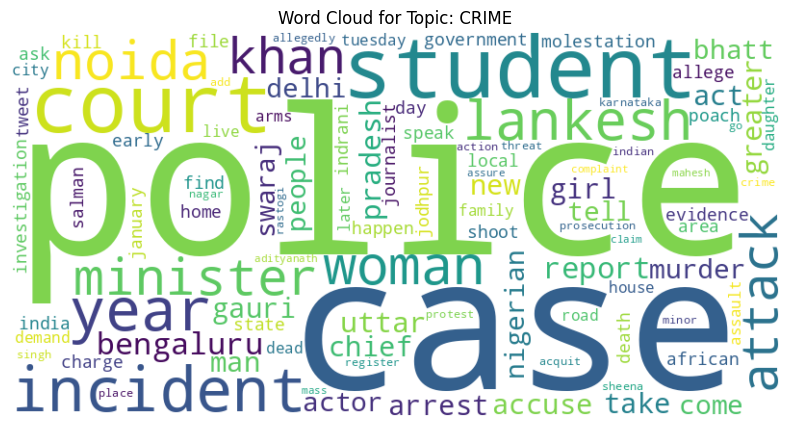

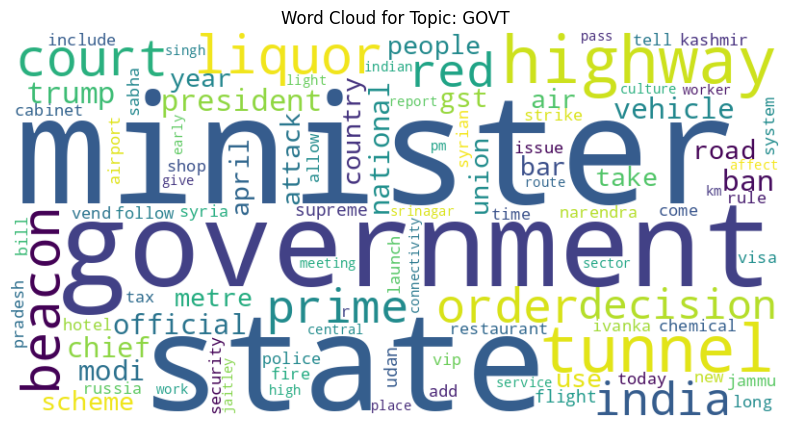

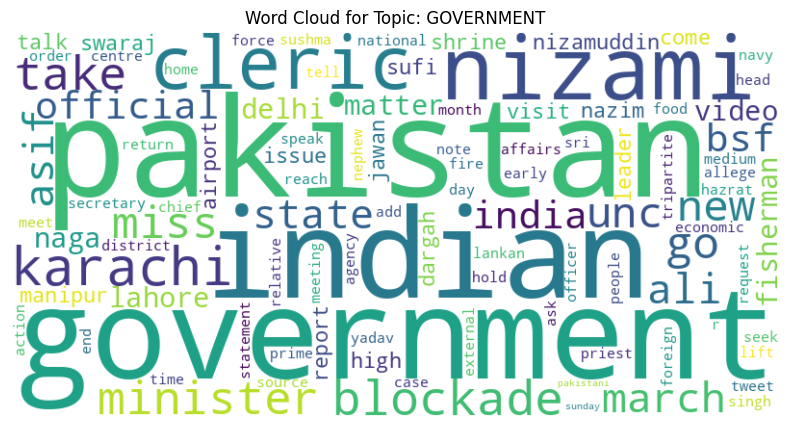

In [33]:
plot_word_clouds_by_topic(df_corrected, token_column='tokens', topic_column='topic')

- To analyse the data I investigate a way to analyse the LDA and we’ll use a popular visualization package, pyLDAvis which is designed to help interactively 

In [34]:
# Visualize LDA
LDAvis_prepared = visualize_lda(
    lda_model=lda_model,
    corpus=corpus,
    id2word=dictionary,
    num_topics=11,
    output_dir='./results'
)

In [35]:
# Split the data into training and test sets
train_df = df_corrected[df_corrected['is_source'] == True].reset_index(drop=True)
test_df = df_corrected[df_corrected['is_source'] == False].reset_index(drop=True)

train_df.to_csv(f"{base_dir}/results/train_df.csv", index=False)
test_df.to_csv(f"{base_dir}/results/test_df.csv", index=False)

- For embeddings, I explored different approaches, but after investigation, there are two possible methods that seem to be the best: using Doc2Vec to vectorize the documents or  a BERT model to generate vectors through a bidirectional interpreter of the text.

In [36]:
# Doc2Vec
from Exploratory_Analysis.document_embeddings import generate_doc_vectors , save_vectors

### Document embeddings using tokens for Doc2Vec
- I tried just with Doc2Vec because our target is to classify the docs by its similarity

In [37]:
print(base_dir)

/home/mab0205/GitHub/Novelty-Detection-Data-Science


In [38]:
doc_embeddings = generate_doc_vectors(df=df_corrected, base_dir= base_dir , name = "doc_embeddings" ,tokens_column= "tokens")

Normalized vectors saved to '/home/mab0205/GitHub/Novelty-Detection-Data-Science/results/doc_embeddings.csv'.


- Doc2Vec was configured with vector_size=100, min_count=6, and epochs=300 because we have over 6,000 news articles, and the documentation suggests these settings for similar datasets. I also experimented with different configurations, such as vector_size between 10 and 20 or min_count=2, but this configuration yielded the best model performance.
- I also implemented a L2 to Normalize vectors  for cosine similarity 

In [60]:
# # Split the data into training and test sets 
# doc_train_embeddings = df_corrected[doc_embeddings['is_source'] == True].reset_index(drop=True)
# doc_test_embeddings = df_corrected[doc_embeddings['is_source'] == False].reset_index(drop=True)
# Convertir los embeddings en un DataFrame si es necesario
if isinstance(doc_embeddings, (list, np.ndarray)):
    doc_embeddings = pd.DataFrame(
        doc_embeddings, 
        columns=[f"embedding_{i}" for i in range(doc_embeddings.shape[1])]
    )
# Combinar embeddings con el DataFrame original
df_combined = pd.concat([df_corrected.reset_index(drop=True), doc_embeddings], axis=1)

# Dividir en conjuntos de entrenamiento y prueba según 'is_source'
train_aux = df_combined[df_combined['is_source'] == True].reset_index(drop=True)
test_aux= df_combined[df_combined['is_source'] == False].reset_index(drop=True)
# Filtrar columnas que contienen 'embedding_'
doc_train_embeddings = train_aux.filter(like='embedding_')
doc_test_embeddings = test_aux.filter(like='embedding_')

In [61]:
len(test_df)+len(train_df)
print(len(doc_train_embeddings),len(doc_test_embeddings))

669 5435


In [62]:
train_df.columns

Index(['category', 'is_source', 'topic', 'DLA', 'content_no_sw', 'PC1',
       'tokens', 'cleaned_text', 'full_text', 'topic_0', 'topic_1', 'topic_2',
       'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8',
       'topic_9', 'topic_10'],
      dtype='object')

In [63]:
# print("First doc Vector", doc_train_embeddings.iloc[0])

- After that now we have a complete dataset: 
1. PC1 for model ( relation between n.words and n.sentences)
2. Category
3. Topics -> DLA 
4. Embbedings -> Doc2Vec

In [64]:
#save embeddings 
save_vectors(doc_train_embeddings, base_dir= base_dir , name = "doc_train_embeddings_final")
save_vectors(doc_test_embeddings,  base_dir= base_dir , name = "doc_test_embeddings_final")

Vectors saved to: /home/mab0205/GitHub/Novelty-Detection-Data-Science/results/doc_train_embeddings_final.csv
Vectors saved to: /home/mab0205/GitHub/Novelty-Detection-Data-Science/results/doc_test_embeddings_final.csv


#############################################################################################################################################################

### MODELS AND NOVELTY DETECTION

In [14]:
# from models.autoencoder import train_autoencoder
from models.models import *
from models.utils import *
import tensorflow as tf
import os
base_dir = os.getcwd()
corpus_dir = os.path.join(base_dir, 'database', 'TAP-DLND-1.0_LREC2018')
# print("Available devices:", tf.config.list_physical_devices()) # check GPU

### Evaluation

> Load Preprocessed Data

In [15]:
train_df = pd.read_csv(f"{base_dir}/results/train_df.csv")
test_df = pd.read_csv(f"{base_dir}/results/test_df.csv")
train_embeddings = pd.read_csv(f"{base_dir}/results/doc_train_embeddings_final.csv")
test_embeddings = pd.read_csv(f"{base_dir}/results/doc_test_embeddings_final.csv")
print(len(train_df),len(train_embeddings))
print(len(test_df),len(test_embeddings))

669 669
5435 5435


In [16]:
selected_columns = [
        "topic_0", "topic_1", "topic_2", "topic_3", "topic_4",
        "topic_5", "topic_6", "topic_7", "topic_8", "topic_9",
        "topic_10", "PC1"
    ]
# Prepare Features
train_features_no_embeddings = prepare_features_without_embeddings(train_df, selected_columns)
test_features_no_embeddings = prepare_features_without_embeddings(test_df, selected_columns)

train_features_combined = combine_features(train_df, train_embeddings, selected_columns)
test_features_combined = combine_features(test_df, test_embeddings, selected_columns)

y_train = train_df['DLA'] #empty
y_test = test_df['DLA']

In [17]:
y_train.to_csv("y_train.csv", index=False)

Now we have the following datasets:

1. train_features_no_embeddings
2. test_features_no_embeddings
3. train_embeddings
4. test_embeddings
5. train_features_combined (combination of features and embeddings)
6. test_features_combined (combination of features and embeddings)
7. y_train (Just used in case of supervised, but in this problem DLA for y_train is empty because the news are the base) 
8. y_test, which indicate novelty and are used for testing
- The goal is to identify the best method for detecting novelty by testing embeddings alone, LDA, or a combination of both.

In [18]:
print(train_features_combined.columns)

Index(['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5',
       'topic_6', 'topic_7', 'topic_8', 'topic_9',
       ...
       'embedding_90', 'embedding_91', 'embedding_92', 'embedding_93',
       'embedding_94', 'embedding_95', 'embedding_96', 'embedding_97',
       'embedding_98', 'embedding_99'],
      dtype='object', length=112)


In [19]:
counts = test_df['DLA'].value_counts(normalize=True) * 100

print("Percentage of each category in the 'DLA' column divided in train and test (Novel -> 1 ... Non-Novel -> 0 ):")
for category, percentage in counts.items():
    print(f"{category}: {percentage:.2f}%")

Percentage of each category in the 'DLA' column divided in train and test (Novel -> 1 ... Non-Novel -> 0 ):
0: 57.61%
1: 42.39%


- We will try to identify novelty using KMeans. For this, the previously created embeddings will be important due to their vector representation and prior normalization. Using these embeddings, we will calculate proximity through cosine similarity to evaluate how close or far our test documents are from the centroid.

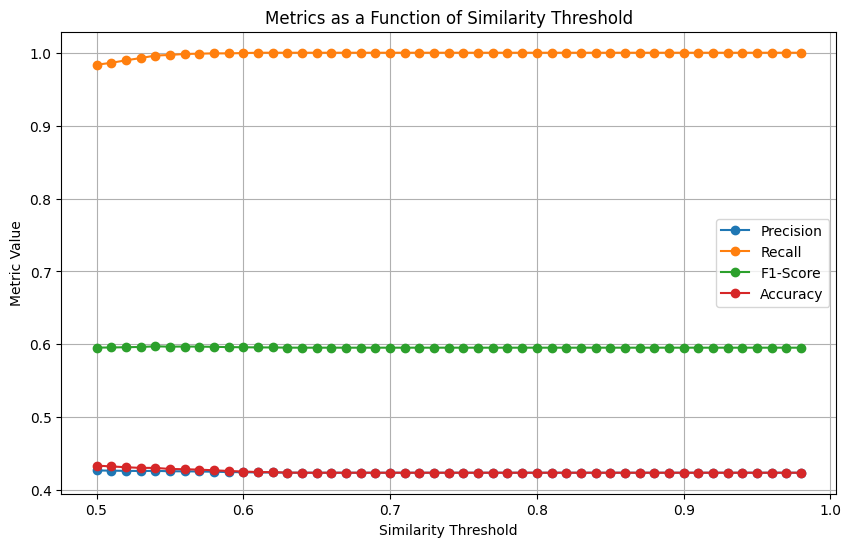

Best Threshold: 0.54
Metrics at Best Threshold: {'threshold': 0.54, 'precision': 0.4265006504367218, 'recall': 0.99609375, 'f1_score': 0.5972674040338322, 'accuracy': 0.43054277828886844}


In [20]:
from models.kmeans_cosine import kmeans_model_and_evaluate_thresholds
# to array to manipulate
base_array = train_embeddings.values
test_array = test_embeddings.values

best_threshold, best_metrics = kmeans_model_and_evaluate_thresholds(test_array, base_array, y_test, n_clusters=11, n_components=60)

- Previously, I conducted some tests using only cosine similarity, and the results were poor, yielding very high precision for a single class while assigning near-zero values  the opposite class. The F1 score was around 0.4, and the accuracy was also 0.4. This is why I decided to develop this hybrid model combining KMeans and cosine similarity in an attempt to improve the results.

## Conclusions

1. **Results and Limitations:**  
   - Although achieving an F1-Score of up to 0.6, the results fell short of expectations.  
   - It is believed that the limited performance is related to the quality of the embeddings, highlighting the need to explore more advanced techniques, such as BERT, to generate more accurate representations.

2. **Two-Step Classification System:**  
   - The idea of a two-step classification system proved promising, but its effectiveness depends heavily on the quality of the initial representations (embeddings) and topic modeling.  
   - Adjustments in the LDA approach and embeddings are essential to validate this solution.

3. **Partially Achieved Objectives:**  
   - The *Novelty Detection* objective was partially achieved, as the system managed to identify patterns but still needs refinement to improve accuracy.  
   - The system development goal was met; however, additional adjustments are necessary for the system to fully accomplish its primary task.  
   - The Bag of Words analysis revealed differences in word frequency across topics, which helped calibrate Doc2Vec and better understand the data's dynamics.


# Sistem 2 classification 
1. Supervised Classification:
- We will train a classifier, such as a neural network, using the train_features_combined_clasi dataset. This dataset includes features such as PC1, embeddings, LDA topics, and a category column that indicates the document's category (e.g., SPORTS, TERROR). Since the category column contains strings, we will first encode it into numerical values. The classifier will be evaluated using F1-score and accuracy to ensure robust performance.

2. Category-Specific Novelty Detection:
- Once the classifier predicts the category of a test document (e.g., SPORTS), we will perform novelty detection within that category. Using the embeddings from the training set corresponding to the predicted category, we will calculate cosine similarity between the test document and the training embeddings. Documents with a similarity below a threshold will be classified as "novelty."

3. Threshold Tuning and Metric Evaluation:
- To optimize the novelty detection performance, thresholds will be tested within the range [0.1, 0.99] with a step size of 0.01. Both the classifier and the novelty detector will be evaluated using precision, recall, F1-score, and accuracy, plotted against the thresholds for better visualization.

In [21]:
# test clasificador
selected_columns_combiando = [
        "topic_0", "topic_1", "topic_2", "topic_3", "topic_4",
        "topic_5", "topic_6", "topic_7", "topic_8", "topic_9",
        "topic_10", "PC1", "category"
    ]

# train_features_combined_clasi = combine_features(train_df, train_embeddings, selected_columns)
# test_features_combined_clasi = combine_features(test_df, test_embeddings, selected_columns)
test_features_combined_clasi = pd.concat([test_df.reset_index(drop=True), test_embeddings.reset_index(drop=True)], axis=1)
train_features_combined_clasi = pd.concat([train_df.reset_index(drop=True), train_embeddings.reset_index(drop=True)], axis=1)
y_train_clasi = train_df['category']
y_test_clasi = test_df['category'] 

y_train = train_df['DLA'] #empty
y_test = test_df['DLA']

In [22]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score

def train_and_evaluate_xgboost_with_grid(train_data, test_data, category_column, feature_columns):
    """
    Train an XGBoost classifier using GridSearchCV and evaluate its performance.

    Args:
        train_data (pd.DataFrame): Training data containing features and category labels.
        test_data (pd.DataFrame): Test data containing features and category labels.
        category_column (str): Name of the column with category labels.
        feature_columns (list): Names of columns with input features.

    Returns:
        best_model: Trained XGBoost classifier with optimal hyperparameters.
        label_encoder: Label encoder used for transforming category labels.
        pd.Series: Predicted categories for the test set.
    """
    # Encode category labels as numbers
    label_encoder = LabelEncoder()
    train_data[category_column] = label_encoder.fit_transform(train_data[category_column])
    test_data[category_column] = label_encoder.transform(test_data[category_column])

    # Prepare features and labels
    X_train = train_data[feature_columns].values
    y_train = train_data[category_column].values
    X_test = test_data[feature_columns].values
    y_test = test_data[category_column].values

    # Define the parameter grid for GridSearchCV
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [4, 6, 8],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.7, 0.8, 1.0],
        'colsample_bytree': [0.7, 0.8, 1.0]
    }

    # Initialize the XGBoost classifier
    xgb = XGBClassifier(
        random_state=42,
        use_label_encoder=False,
        eval_metric='mlogloss'
    )

    # Perform grid search
    grid_search = GridSearchCV(
        estimator=xgb,
        param_grid=param_grid,
        scoring='f1_weighted',
        cv=3,
        verbose=1,
        n_jobs=-1
    )

    print("Starting Grid Search...")
    grid_search.fit(X_train, y_train)

    # Get the best model and parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    print(f"Best Parameters: {best_params}")

    # Evaluate the best model
    predictions = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='weighted')

    print("XGBoost Classifier Performance (Best Model):")
    print(classification_report(y_test, predictions))
    print(f"Accuracy: {accuracy:.4f}, F1-Score: {f1:.4f}")

    return best_model, label_encoder, predictions


In [23]:
from sklearn.metrics import precision_score, recall_score

def novelty_detector(test_data, train_data, category_column, embeddings_columns, predictions, thresholds=None):
    """
    Detect novelty using cosine similarity within the same category.

    Args:
        test_data (pd.DataFrame): Test dataset with features and categories.
        train_data (pd.DataFrame): Training dataset with features and categories.
        category_column (str): Name of the column containing the category labels.
        embeddings_columns (list): List of column names for the embeddings.
        predictions (list): Predicted categories for the test dataset.
        thresholds (np.ndarray, optional): Array of similarity thresholds. Defaults to np.arange(0.1, 0.99, 0.01).

    Returns:
        float: Best threshold based on F1-Score.
        dict: Metrics associated with the best threshold.
    """
    if thresholds is None:
        thresholds = np.arange(0.1, 0.99, 0.01)

    precision_list, recall_list, f1_list, accuracy_list = [], [], [], []

    novelty_predictions = []  # To store novelty classification results (1: novelty, 0: no novelty)

    # Loop through test documents
    for i, test_doc in test_data.iterrows():
        # Predicted category for the test document
        predicted_category = predictions[i]

        # Filter training data for the same category
        train_category_subset = train_data[train_data[category_column] == predicted_category]

        if train_category_subset.empty:
            # If no documents in the same category, classify as novelty
            novelty_predictions.append(1)
            continue

        # Extract embeddings for cosine similarity
        test_embedding = test_doc[embeddings_columns].values.reshape(1, -1)
        train_embeddings = train_category_subset[embeddings_columns].values

        # Compute cosine similarity
        similarities = cosine_similarity(test_embedding, train_embeddings)
        max_similarity = similarities.max()

        # Classify based on threshold (default is 0.75)
        novelty_predictions.append(1 if max_similarity < thresholds.mean() else 0)

    # Evaluate novelty detection metrics
    for threshold in thresholds:
        predictions_binary = [
            1 if pred == 1 and max_similarity < threshold else 0
            for pred, max_similarity in zip(novelty_predictions, thresholds)
        ]

        # Calculate metrics
        precision_list.append(precision_score(test_data[category_column], predictions_binary, zero_division=0))
        recall_list.append(recall_score(test_data[category_column], predictions_binary, zero_division=0))
        f1_list.append(f1_score(test_data[category_column], predictions_binary, zero_division=0))
        accuracy_list.append(accuracy_score(test_data[category_column], predictions_binary))

    # Identify the best threshold based on F1-Score
    best_threshold_index = np.argmax(f1_list)
    best_threshold = thresholds[best_threshold_index]
    best_metrics = {
        "threshold": best_threshold,
        "precision": precision_list[best_threshold_index],
        "recall": recall_list[best_threshold_index],
        "f1_score": f1_list[best_threshold_index],
        "accuracy": accuracy_list[best_threshold_index],
    }

    return best_threshold, best_metrics, precision_list, recall_list, f1_list, accuracy_list


In [24]:
import matplotlib.pyplot as plt

def plot_metrics(thresholds, precision_list, recall_list, f1_list, accuracy_list, best_threshold, best_metrics):
    """
    Plot metrics and display the best results.

    Args:
        thresholds (np.ndarray): Array of thresholds.
        precision_list (list): List of precision values for each threshold.
        recall_list (list): List of recall values for each threshold.
        f1_list (list): List of F1 scores for each threshold.
        accuracy_list (list): List of accuracy values for each threshold.
        best_threshold (float): Best threshold value.
        best_metrics (dict): Metrics for the best threshold.

    Returns:
        None
    """
    # Plot metrics
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, precision_list, label="Precision", marker='o')
    plt.plot(thresholds, recall_list, label="Recall", marker='o')
    plt.plot(thresholds, f1_list, label="F1-Score", marker='o')
    plt.plot(thresholds, accuracy_list, label="Accuracy", marker='o')
    plt.title("Metrics as a Function of Similarity Threshold")
    plt.xlabel("Similarity Threshold")
    plt.ylabel("Metric Value")
    plt.legend()
    plt.grid()
    plt.show()

    # Display the best metrics
    print(f"Best Threshold: {best_threshold:.2f}")
    print(f"Metrics at Best Threshold: {best_metrics}")

In [ ]:

thresholds = np.arange(0.1, 0.99, 0.01)
# Definir las columnas de características
feature_columns = ['PC1'] + [f'embedding_{i}' for i in range(100)] + [f'topic_{i}' for i in range(10)]

# Llamar a la función con los datos de entrenamiento y prueba
best_model, label_encoder, predictions = train_and_evaluate_xgboost_with_grid(
    train_data=train_features_combined_clasi,
    test_data=test_features_combined_clasi,
    category_column='category',
    feature_columns=feature_columns
)

In [ ]:
best_threshold, best_metrics, precision_list, recall_list, f1_list, accuracy_list = novelty_detector(
    test_embeddings, train_embeddings
)
plot_metrics(thresholds, precision_list, recall_list, f1_list, accuracy_list, best_threshold, best_metrics)
